In [5]:
base_path = "/content/drive/MyDrive"

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Suppress only FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Suppress only DeprecationWarnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [ ]:
import pandas as pd
import numpy as np
import os
import shutil

# Set options to control the display of DataFrames
pd.set_option('display.max_rows', 10)         # Number of rows to display
pd.set_option('display.max_columns', 50)       # Number of columns to display
pd.set_option('display.max_colwidth', 500)    # Maximum width of each column
pd.set_option('display.width', 10000)          # Width of the display in characters

# Loading the Clinical Notes tables

In [ ]:
df_noteevents = pd.read_csv(f"{base_path}/BM7/Dissertation/Datasets/noteevents.csv")

<ipython-input-21-b4719175a3b9>:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_noteevents = pd.read_csv("/content/drive/MyDrive/BM7/Dissertation/Datasets/noteevents.csv")


In [ ]:
df_noteevents.head(1)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,"Admission Date: [**2151-7-16**] Discharge Date: [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES: Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis. This also\nmoderate-sized left pleural effusion.\n\nHEAD CT: Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT: Abdominal CT showed lesions..."


In [ ]:
# Display basic statistics
print(f"Shape of NOTEEVENTS: {df_noteevents.shape}")

# Unique values in categorical columns
print('\n Unique CATEGORY')
print(df_noteevents['CATEGORY'].unique())
print('\n Unique DESCRIPTION')
print(df_noteevents['DESCRIPTION'].unique())

Shape of NOTEEVENTS: (2083180, 11)

 Unique CATEGORY
['Discharge summary' 'Echo' 'ECG' 'Nursing' 'Physician ' 'Rehab Services'
 'Case Management ' 'Respiratory ' 'Nutrition' 'General' 'Social Work'
 'Pharmacy' 'Consult' 'Radiology' 'Nursing/other']

 Unique DESCRIPTION
['Report' 'Addendum' 'Nursing Transfer Note' ...
 'PLACE CATH CAROTID/INOM ART' 'L US MSK ASPIRATE/INJ GANGLION CYST LEFT'
 'RO HIP NAILING IN OR W/FILMS & FLUORO RIGHT IN O.R.']


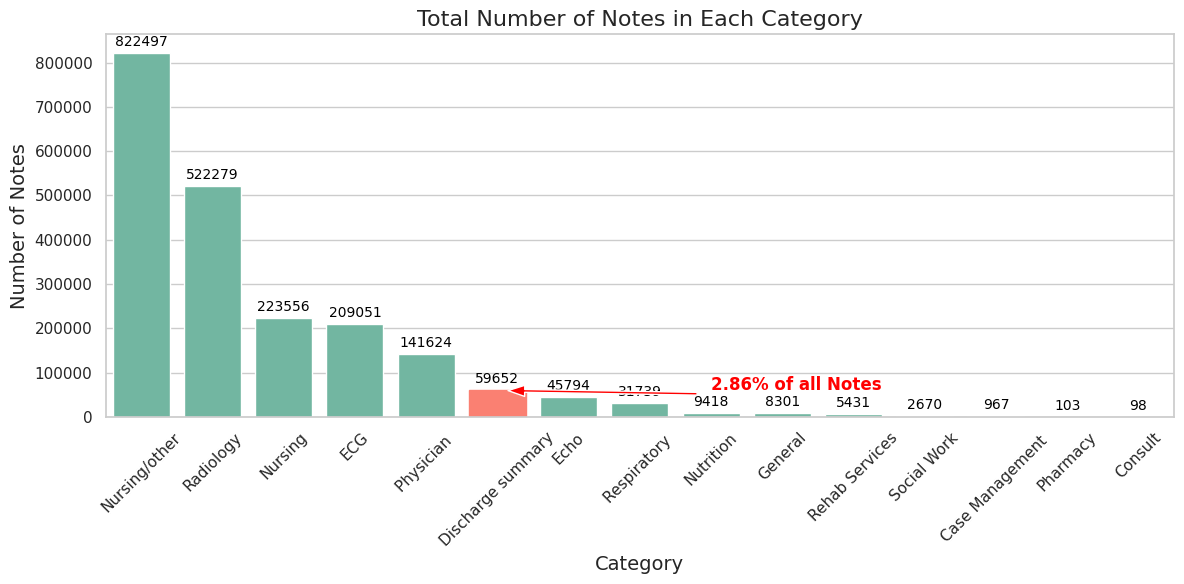

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Sorting categories based on their count for consistent ordering
category_order = df_noteevents['CATEGORY'].value_counts().index
discharge_summary_count = df_noteevents['CATEGORY'].value_counts()['Discharge summary']
total_notes_count = len(df_noteevents)

# Calculate the percentage
discharge_summary_percentage = (discharge_summary_count / total_notes_count) * 100

plt.figure(figsize=(12, 6))
sns.set_palette("Set2")  # Using a distinct color palette
ax = sns.countplot(data=df_noteevents, x='CATEGORY', order=category_order)

# Highlight 'Discharge Summary' with a different color
for patch in ax.patches:
    if patch.get_x() + patch.get_width() / 2 in [category_order.get_loc('Discharge summary')]:
        patch.set_color('salmon')

# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', rotation=0, xytext=(0, 5),
                textcoords='offset points')

# Adding an arrow annotation for 'Discharge Summary'
discharge_summary_x = category_order.get_loc('Discharge summary')
ax.annotate(f"{discharge_summary_percentage:.2f}% of all Notes",
            xy=(discharge_summary_x, discharge_summary_count),
            xytext=(discharge_summary_x + 3, discharge_summary_count + 1000),
            arrowprops=dict(facecolor='red', shrink=0.05, width=2, headwidth=8),
            fontsize=12, color='red', weight='bold')

plt.title('Total Number of Notes in Each Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Notes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Filter for Discharge Summaries

In [ ]:
# Filter for discharge summaries
df_dischargenotes = df_noteevents[df_noteevents['CATEGORY'] == 'Discharge summary']
df_dischargenotes.shape

(59652, 11)

Discharge Notes CSV saved

In [ ]:
df_dischargenotes.to_csv(f'{base_path}/BM7/Dissertation/Datasets/dischargenotes.csv', index=False)

# Direct Import for Discharge Summaries

In [ ]:
df_dischargenotes = pd.read_csv(f'{base_path}/BM7/Dissertation/Datasets/dischargenotes.csv')
# df_dischargenotes = pd.read_csv(r"G:\My Drive\BM7\Dissertation\Datasets\dischargenotes.csv")

In [ ]:
df_dischargenotes.shape

(59652, 11)

<ipython-input-40-f75e351dd782>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_dischargenotes,


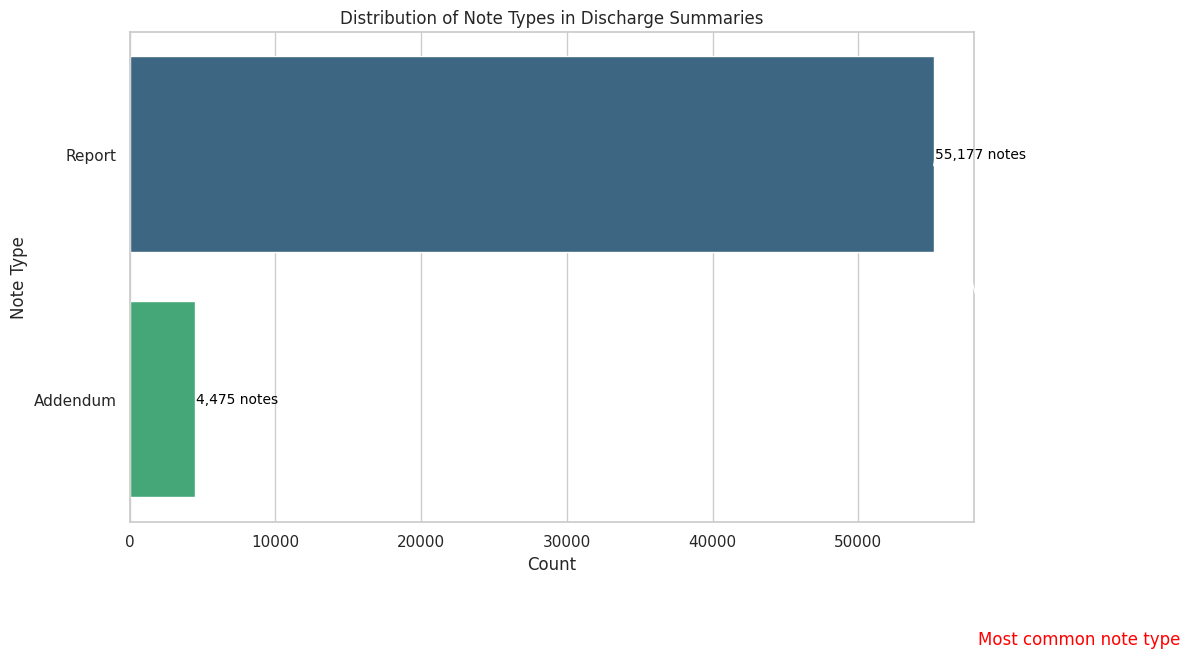

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of 'DESCRIPTION' types in the discharge summaries
plt.figure(figsize=(10, 6))
sns.countplot(data=df_dischargenotes,
              y='DESCRIPTION',
              order=df_dischargenotes['DESCRIPTION'].value_counts().index,
              palette='viridis')

plt.title('Distribution of Note Types in Discharge Summaries')
plt.xlabel('Count')
plt.ylabel('Note Type')
plt.tight_layout()

# Annotate the top 3 most common note types
top_notes = df_dischargenotes['DESCRIPTION'].value_counts().head(3)
for i, (note, count) in enumerate(top_notes.items()):
    plt.text(count + 100, i, f'{count:,} notes', va='center', ha='left', fontsize=10, color='black')

# Highlight the top note type with a red arrow
plt.annotate('Most common note type',
             xy=(top_notes.iloc[0], 0),
             xytext=(top_notes.iloc[0] + 3000, 2),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             fontsize=12, color='red')

plt.show()


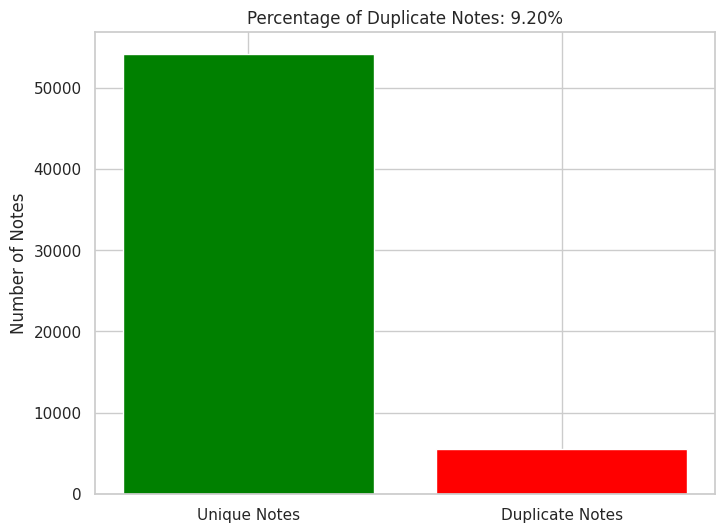

In [ ]:
# Calculate the total number of records and the number of duplicates
total_records = len(df_dischargenotes)
duplicate_records = duplicates_per_admission['Duplicate Count'].sum()
duplicate_percentage = (duplicate_records / total_records) * 100

# Plotting percentage of duplicates
plt.figure(figsize=(8, 6))
plt.bar(['Unique Notes', 'Duplicate Notes'], [total_records - duplicate_records, duplicate_records], color=['green', 'red'])
plt.title(f'Percentage of Duplicate Notes: {duplicate_percentage:.2f}%')
plt.ylabel('Number of Notes')
plt.show()


### Drop Duplicates

In [ ]:
dup = df_dischargenotes.duplicated(subset=['HADM_ID','DESCRIPTION']).any()
dup

True

In [ ]:
df_dischargenotes.shape

(59652, 11)

In [ ]:
df_dischargenotes.nunique()

ROW_ID         59652
SUBJECT_ID     41127
HADM_ID        52726
CHARTDATE      28282
CHARTTIME          0
               ...  
CATEGORY           1
DESCRIPTION        2
CGID               0
ISERROR            0
TEXT           59568
Length: 11, dtype: int64

With Report and Addendum both

In [ ]:
# drop duplicates based on HADM_ID and Description, keeping the first entry
df_dischargenotes = df_dischargenotes.drop_duplicates(subset=['HADM_ID','DESCRIPTION'], keep='first')

In [ ]:
df_dischargenotes.shape

(56698, 11)

With Just Report Category

In [ ]:
# df_report = df_dischargenotes[df_dischargenotes['DESCRIPTION'] == 'Report']

In [ ]:
df_report.to_csv(f'{base_path}/BM7/Dissertation/Datasets/dischargenotes_R.csv', index=False)

In [ ]:
df_report.shape

(52691, 11)

In [ ]:
df_report.nunique()

ROW_ID         52691
SUBJECT_ID     41103
HADM_ID        52691
CHARTDATE      27615
CHARTTIME          0
               ...  
CATEGORY           1
DESCRIPTION        1
CGID               0
ISERROR            0
TEXT           52691
Length: 11, dtype: int64

In [ ]:
# duplicates = df_dischargenotes[df_dischargenotes.duplicated(subset='HADM_ID', keep=False)]
# duplicates

# **Importing Notes with only Report category**

In [8]:
df_dischargenotes = pd.read_csv(f'{base_path}/BM7/Dissertation/Datasets/dischargenotes_R.csv')

# Tables Pre-Processing and Data preparation

## DischargeNotes Table

### Data Wrangling

In [ ]:
# Display basic statistics
print(f"Shape of NOTEEVENTS: {df_dischargenotes.shape}")

# Check for missing values
print('\n Null Values')
print(df_dischargenotes.isnull().sum())

print('\n')
print(df_dischargenotes.info())

# Unique values in categorical columns
print('\n Unique CATEGORY')
print(df_dischargenotes['CATEGORY'].unique())
print('\n Unique DESCRIPTION')
print(df_dischargenotes['DESCRIPTION'].unique())

Shape of NOTEEVENTS: (52691, 11)

 Null Values
ROW_ID             0
SUBJECT_ID         0
HADM_ID            0
CHARTDATE          0
CHARTTIME      52691
               ...  
CATEGORY           0
DESCRIPTION        0
CGID           52691
ISERROR        52691
TEXT               0
Length: 11, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52691 entries, 0 to 52690
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ROW_ID       52691 non-null  int64  
 1   SUBJECT_ID   52691 non-null  int64  
 2   HADM_ID      52691 non-null  float64
 3   CHARTDATE    52691 non-null  object 
 4   CHARTTIME    0 non-null      float64
 5   STORETIME    0 non-null      float64
 6   CATEGORY     52691 non-null  object 
 7   DESCRIPTION  52691 non-null  object 
 8   CGID         0 non-null      float64
 9   ISERROR      0 non-null      float64
 10  TEXT         52691 non-null  object 
dtypes: float64(5), int64(2), object(4)


In [ ]:
df_dischargenotes.head(1)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,"Admission Date: [**2151-7-16**] Discharge Date: [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES: Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis. This also\nmoderate-sized left pleural effusion.\n\nHEAD CT: Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT: Abdominal CT showed lesions..."


In [ ]:
df_dischargenotes.tail(1)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
52690,53617,87196,121964.0,2186-06-16,NaN,NaN,Discharge summary,Report,NaN,NaN,"Admission Date: [**2186-6-16**] Discharge Date: [**2186-6-16**]\n\nDate of Birth: [**2141-9-9**] Sex: M\n\nService: SURGERY\n\nAllergies:\nNo Allergies/ADRs on File\n\nAttending:[**First Name3 (LF) 4691**]\nChief Complaint:\ntrauma\n\nMajor Surgical or Invasive Procedure:\nexploratory laparotomy\n\nHistory of Present Illness:\n45M MVC restrained driver car vs tree; no intrusion; PEA on\nscene, GCS 3, SBP60s without LE pulses transfused 4u pRBCs. He\nwas hemodyn..."


### Handling Missing Values

<ipython-input-12-c4c8476465fd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


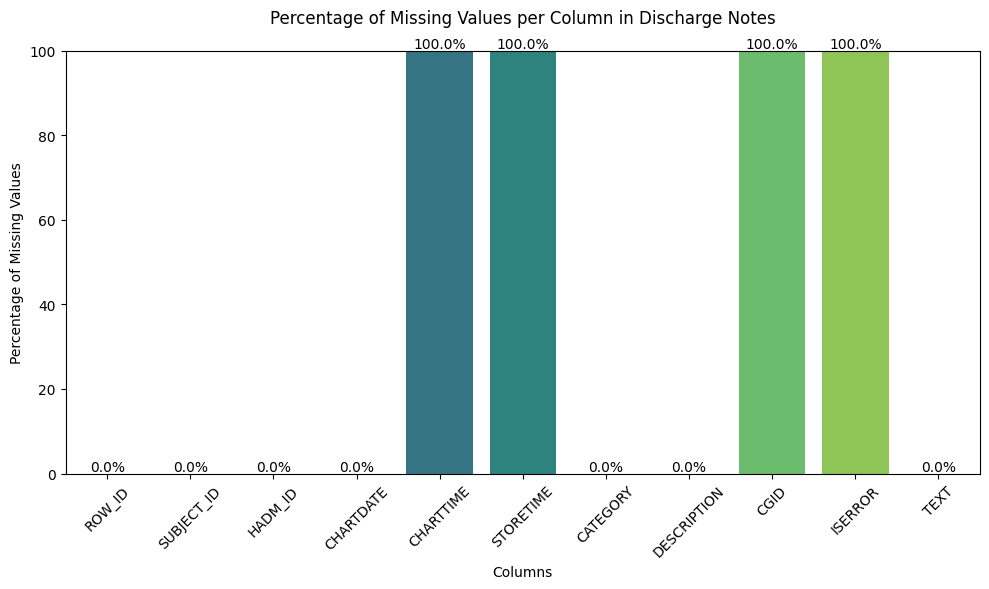

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_dischargenotes is already loaded

# Calculate the percentage of missing values for each column
missing_values = df_dischargenotes.isnull().mean() * 100

# Create a bar chart for missing values
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title('Percentage of Missing Values per Column in Discharge Notes', pad=20)  # Adjust title position with 'pad'
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Limit y-axis to 0-100%

# Annotate the bars with the percentage of missing values
for bar in bars.patches:
    plt.annotate(f'{bar.get_height():.1f}%',
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Drop columns with all null values
df_dischargenotes.drop(columns=['CHARTTIME', 'STORETIME', 'CGID', 'ISERROR'], inplace=True)

In [ ]:
df_dischargenotes['HADM_ID'] = df_dischargenotes['HADM_ID'].astype(int)

# Convert CHARTDATE to datetime
df_dischargenotes['CHARTDATE'] = pd.to_datetime(df_dischargenotes['CHARTDATE'])

In [ ]:
df_dischargenotes.isnull().sum()

ROW_ID         0
SUBJECT_ID     0
HADM_ID        0
CHARTDATE      0
CATEGORY       0
DESCRIPTION    0
TEXT           0
dtype: int64

In [ ]:
df_dischargenotes.head(1)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CATEGORY,DESCRIPTION,TEXT
0,174,22532,167853,2151-08-04,Discharge summary,Report,"Admission Date: [**2151-7-16**] Discharge Date: [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES: Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis. This also\nmoderate-sized left pleural effusion.\n\nHEAD CT: Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT: Abdominal CT showed lesions..."


In [ ]:
df_dischargenotes.tail(1)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CATEGORY,DESCRIPTION,TEXT
52690,53617,87196,121964,2186-06-16,Discharge summary,Report,"Admission Date: [**2186-6-16**] Discharge Date: [**2186-6-16**]\n\nDate of Birth: [**2141-9-9**] Sex: M\n\nService: SURGERY\n\nAllergies:\nNo Allergies/ADRs on File\n\nAttending:[**First Name3 (LF) 4691**]\nChief Complaint:\ntrauma\n\nMajor Surgical or Invasive Procedure:\nexploratory laparotomy\n\nHistory of Present Illness:\n45M MVC restrained driver car vs tree; no intrusion; PEA on\nscene, GCS 3, SBP60s without LE pulses transfused 4u pRBCs. He\nwas hemodyn..."


In [ ]:
df_dischargenotes.shape

(52691, 7)

In [ ]:
df_dischargenotes['HADM_ID'].nunique()

52691

In [ ]:
df_dischargenotes['DESCRIPTION'].value_counts()

DESCRIPTION
Report    52691
Name: count, dtype: int64

### EDA for Discharge Summaries

Temoporal Analysis

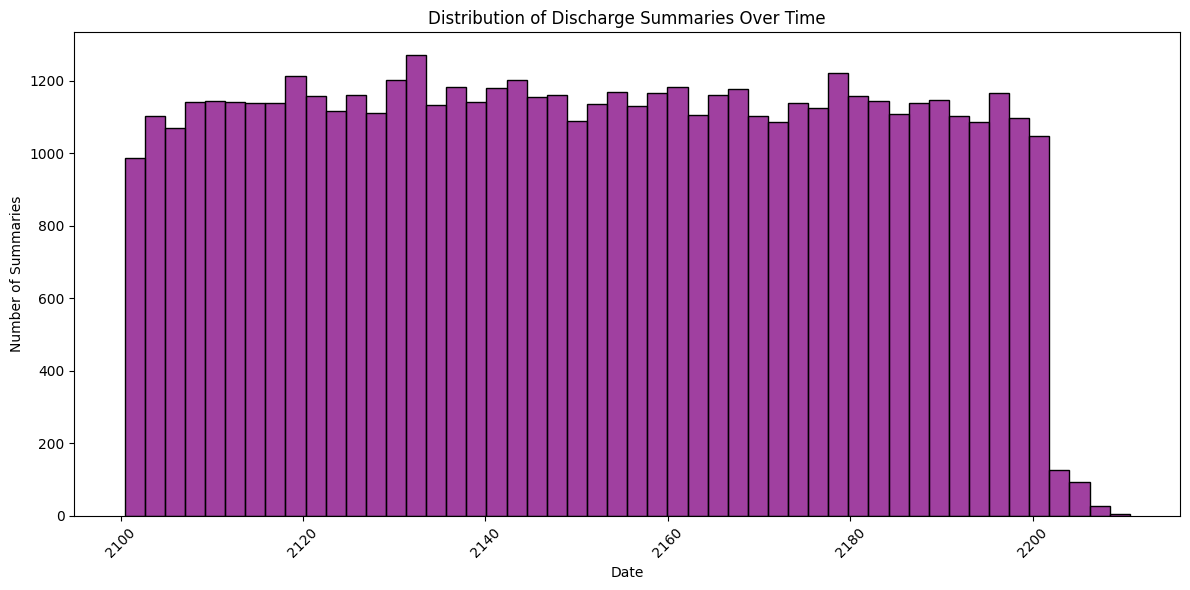

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Convert 'CHARTDATE' to datetime format
df_dischargenotes['CHARTDATE'] = pd.to_datetime(df_dischargenotes['CHARTDATE'])

# Plotting the number of discharge summaries over time
plt.figure(figsize=(12, 6))
sns.histplot(df_dischargenotes['CHARTDATE'], bins=50, color='purple')
plt.title('Distribution of Discharge Summaries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Summaries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Diagnosis_ICD Table

In [ ]:
# df_diagnoses_icd = pd.read_csv(r"G:\My Drive\BM7\Dissertation\Datasets\diagnoses_icd.csv")

df_diagnoses_icd = pd.read_csv(f"{base_path}/BM7/Dissertation/Datasets/diagnoses_icd.csv")

In [ ]:
df_diagnoses_icd.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


### Data Wrangling

In [ ]:
# Data shape
print("Diagnoses_ICD Data Shape:")
print(df_diagnoses_icd.shape)  # Number of rows and columns

Diagnoses_ICD Data Shape:
(651047, 5)


In [ ]:
# Basic statistics
diagnoses_stats = df_diagnoses_icd.describe()

# Check for null values
diagnoses_null = df_diagnoses_icd.isnull().sum()

# Unique values
diagnoses_unique = df_diagnoses_icd.nunique()

print("\nDiagnoses_ICD Statistics:")
print(diagnoses_stats)
print("\nDiagnoses_ICD Null Values:")
print(diagnoses_null)
print("\nDiagnoses_ICD Unique Values:")
print(diagnoses_unique)


Diagnoses_ICD Statistics:
             ROW_ID     SUBJECT_ID        HADM_ID        SEQ_NUM
count  651047.00000  651047.000000  651047.000000  651000.000000
mean   325524.00000   38971.159758  150017.744819       7.913836
std    187941.22469   29372.198841   28878.068648       6.072633
min         1.00000       2.000000  100001.000000       1.000000
25%    162762.50000   14562.500000  125028.000000       3.000000
50%    325524.00000   28671.000000  150140.000000       6.000000
75%    488285.50000   63715.000000  174978.000000      11.000000
max    651047.00000   99999.000000  199999.000000      39.000000

Diagnoses_ICD Null Values:
ROW_ID         0
SUBJECT_ID     0
HADM_ID        0
SEQ_NUM       47
ICD9_CODE     47
dtype: int64

Diagnoses_ICD Unique Values:
ROW_ID        651047
SUBJECT_ID     46520
HADM_ID        58976
SEQ_NUM           39
ICD9_CODE       6984
dtype: int64


In [ ]:
df_diagnoses_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      651047 non-null  int64  
 1   SUBJECT_ID  651047 non-null  int64  
 2   HADM_ID     651047 non-null  int64  
 3   SEQ_NUM     651000 non-null  float64
 4   ICD9_CODE   651000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB


In [ ]:
df_diag_icd_1 = df_diagnoses_icd[df_diagnoses_icd['SEQ_NUM'] == 1.0]

In [ ]:
df_diag_icd_1.shape

(58929, 5)

In [ ]:
df_diag_icd_1.nunique()

ROW_ID        58929
SUBJECT_ID    46517
HADM_ID       58929
SEQ_NUM           1
ICD9_CODE      2789
dtype: int64

### EDA for Diagnosis_ICD

In [ ]:
#Importing diagnosis codes dictionary:
D_diagnoses_icd = pd.read_csv(f'{base_path}/BM7/Dissertation/Datasets/D_ICD_DIAGNOSES.csv')

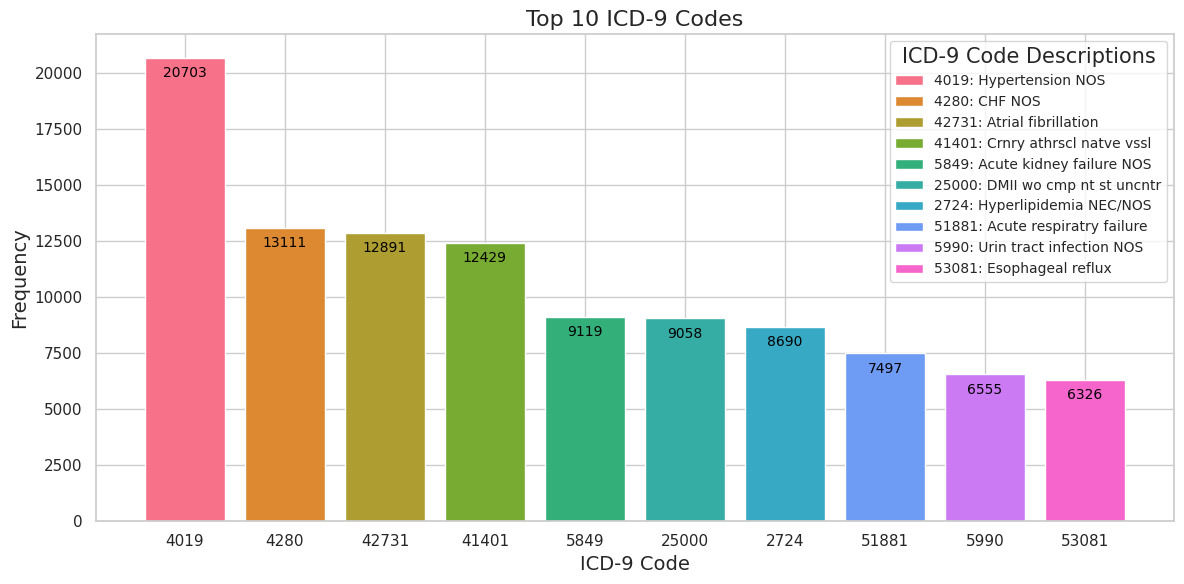

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_diagnoses_icd and D_diagnoses_icd are your dataframes
# Merge the two dataframes on the 'ICD9_CODE' column
merged_df = pd.merge(df_diagnoses_icd, D_diagnoses_icd, on='ICD9_CODE')

# Get the top 10 ICD-9 codes by frequency
top_icd_codes = merged_df['ICD9_CODE'].value_counts().head(10)

# Get the corresponding short titles for these top ICD-9 codes
top_icd_codes_titles = D_diagnoses_icd.set_index('ICD9_CODE').loc[top_icd_codes.index]['SHORT_TITLE']

# Combine ICD-9 codes with their titles for the legend
legend_labels = [f"{code}: {title}" for code, title in zip(top_icd_codes.index, top_icd_codes_titles)]

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_icd_codes.index, top_icd_codes.values, color=sns.color_palette("husl", 10))

# Title and labels
plt.title('Top 10 ICD-9 Codes', fontsize=16)
plt.xlabel('ICD-9 Code', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Annotating the bars with count values
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 1000,
        bar.get_height(),
        ha='center',
        va='bottom',
        color='black',
        fontsize=10
    )

# Custom legend with ICD-9 code descriptions
plt.legend(bars, legend_labels, title='ICD-9 Code Descriptions', loc='upper right', fontsize=10, title_fontsize='15')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


## Procedures_ICD Table

In [ ]:
# df_procedures_icd = pd.read_csv(r"G:\My Drive\BM7\Dissertation\Datasets\procedures_icd.csv")

df_procedures_icd = pd.read_csv(f"{base_path}/BM7/Dissertation/Datasets/procedures_icd.csv")

In [ ]:
df_procedures_icd.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,3404
1,945,2592,130856,1,9671
2,946,2592,130856,2,3893
3,947,55357,119355,1,9672
4,948,55357,119355,2,331


In [ ]:
# Data shape
print("Procedures_ICD Data Shape:")
print(df_procedures_icd.shape)  # Number of rows and columns

Procedures_ICD Data Shape:
(240095, 5)


In [ ]:
# Basic statistics
procedures_stats = df_procedures_icd.describe()

# Check for null values
procedures_null = df_procedures_icd.isnull().sum()

# Unique values
procedures_unique = df_procedures_icd.nunique()

print("\nProcedures_ICD Statistics:")
print(procedures_stats)
print("\nProcedures_ICD Null Values:")
print(procedures_null)
print("\nProcedures_ICD Unique Values:")
print(procedures_unique)


Procedures_ICD Statistics:
              ROW_ID     SUBJECT_ID        HADM_ID        SEQ_NUM      ICD9_CODE
count  240095.000000  240095.000000  240095.000000  240095.000000  240095.000000
mean   120048.000000   32851.481472  150082.948591       4.388434    5689.421350
std     69309.600778   27771.642798   28918.380367       3.772549    3307.832868
min         1.000000       2.000000  100003.000000       1.000000      10.000000
25%     60024.500000   11615.000000  125186.000000       2.000000    3614.000000
50%    120048.000000   23450.000000  149988.000000       3.000000    4319.000000
75%    180071.500000   51951.000000  175340.000000       6.000000    9390.000000
max    240095.000000   99999.000000  199999.000000      40.000000    9999.000000

Procedures_ICD Null Values:
ROW_ID        0
SUBJECT_ID    0
HADM_ID       0
SEQ_NUM       0
ICD9_CODE     0
dtype: int64

Procedures_ICD Unique Values:
ROW_ID        240095
SUBJECT_ID     42214
HADM_ID        52243
SEQ_NUM           40
ICD9_C

In [ ]:
df_procedures_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240095 entries, 0 to 240094
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   ROW_ID      240095 non-null  int64
 1   SUBJECT_ID  240095 non-null  int64
 2   HADM_ID     240095 non-null  int64
 3   SEQ_NUM     240095 non-null  int64
 4   ICD9_CODE   240095 non-null  int64
dtypes: int64(5)
memory usage: 9.2 MB


In [ ]:
df_proc_icd_1 = df_procedures_icd[df_procedures_icd['SEQ_NUM'] == 1]
df_proc_icd_1.shape

(52243, 5)

In [ ]:
df_proc_icd_1.nunique()

ROW_ID        52243
SUBJECT_ID    42214
HADM_ID       52243
SEQ_NUM           1
ICD9_CODE      1285
dtype: int64

# Merging the 3 Tables

### 1. Merge diagnoses_icd and Proceduces_icd dataframes

In [ ]:
# Merging diagnosis and procedures datasets on SUBJECT_ID and HADM_ID
merged_diag_proc = pd.merge(df_diag_icd_1, df_proc_icd_1, on=['HADM_ID'], how='inner', suffixes=('_diag', '_proc'))

# Display the result
print("Merged Diagnosis and Procedures DataFrame:")
merged_diag_proc.head()

Merged Diagnosis and Procedures DataFrame:


,ROW_ID_diag,SUBJECT_ID_diag,HADM_ID,SEQ_NUM_diag,ICD9_CODE_diag,ROW_ID_proc,SUBJECT_ID_proc,SEQ_NUM_proc,ICD9_CODE_proc
0,1297,109,172335,1.0,40301,142433,109,1,5498
1,1311,109,173633,1.0,40301,149210,109,1,3995
2,1488,112,174105,1.0,53100,74432,112,1,4443
3,1493,113,109976,1.0,1915,60682,113,1,159
4,1496,114,178393,1.0,41401,3215,114,1,3612


In [ ]:
merged_diag_proc.shape

(52243, 9)

In [ ]:
merged_diag_proc.nunique()

ROW_ID_diag        52243
SUBJECT_ID_diag    42214
HADM_ID            52243
SEQ_NUM_diag           1
ICD9_CODE_diag      2632
ROW_ID_proc        52243
SUBJECT_ID_proc    42214
SEQ_NUM_proc           1
ICD9_CODE_proc      1285
dtype: int64

In [ ]:
df_dischargenotes.shape


(52691, 7)

### 2. Merging with Note-Events (Discharge Summary) DataFrame

In [ ]:
# Merging the above result with note-events dataset on SUBJECT_ID and HADM_ID
merged_all = pd.merge(merged_diag_proc, df_dischargenotes, on=['HADM_ID'], how='inner')

# Display the result
print("\nMerged with Note-Events |DataFrame:")
merged_all.head()


Merged with Note-Events |DataFrame:


,ROW_ID_diag,SUBJECT_ID_diag,HADM_ID,SEQ_NUM_diag,ICD9_CODE_diag,ROW_ID_proc,SUBJECT_ID_proc,SEQ_NUM_proc,ICD9_CODE_proc,ROW_ID,SUBJECT_ID,CHARTDATE,CATEGORY,DESCRIPTION,TEXT
0,1297,109,172335,1.0,40301,142433,109,1,5498,14797,109,2141-09-24,Discharge summary,Report,"Admission Date: [**2141-9-18**] Discharge Date: [**2141-9-24**]\n\nDate of Birth: [**2117-8-7**] Sex: F\n\nService: MEDICINE\n\nAllergies:\nPenicillins / Percocet\n\nAttending:[**First Name3 (LF) 1936**]\nChief Complaint:\nhip pain\n\nMajor Surgical or Invasive Procedure:\nNone\n\n\nHistory of Present Illness:\n24yo woman with hx SLE, CKD(not currently on HD or PD), labile\nHTN here with right leg pain and HTN urgency. Patient was\nrecently d/ced on [**9-14**] ..."
1,1311,109,173633,1.0,40301,149210,109,1,3995,14801,109,2141-12-14,Discharge summary,Report,Admission Date: [**2141-12-8**] Discharge Date: [**2141-12-14**]\n\nDate of Birth: [**2117-8-7**] Sex: F\n\nService: MEDICINE\n\nAllergies:\nPenicillins / Percocet\n\nAttending:[**First Name3 (LF) 8104**]\nChief Complaint:\nabdominal pain & hypertension\n\nMajor Surgical or Invasive Procedure:\nHemodialysis\nPICC Line [**12-11**]\n\nHistory of Present Illness:\nMs [**Known lastname **] is a 24 year old woman with a history of CKD V (on HD)\nfrom lupus nephritis...
2,1488,112,174105,1.0,53100,74432,112,1,4443,54002,112,2194-06-18,Discharge summary,Report,"Admission Date: [**2194-6-13**] Discharge Date: [**2194-6-18**]\n\n\nService:\n\n\nHISTORY OF PRESENT ILLNESS: The patient is a [**Age over 90 **]-year-old man\nwith a history of peptic ulcer disease, coronary artery\ndisease, status post myocardial infarction in [**2179**] as well as\n[**2193**], temporal arteritis, who presented with melenas and\nchest pain. The patient reported melanotic stools times 5\nsince 4 p.m. on the day prior to admission. No hematemesis or\nhematochezia. ..."
3,1493,113,109976,1.0,1915,60682,113,1,159,10256,113,2140-12-27,Discharge summary,Report,"Admission Date: [**2140-12-12**] Discharge Date: [**2140-12-27**]\n\nDate of Birth: [**2105-2-9**] Sex: M\n\nService:\n\n\nHISTORY OF PRESENT ILLNESS: The patient is a 35 year old\ngentleman who woke up with severe headache, woke up with a\n[**11-20**] frontal headache that was constant. Took Advil and\nTylenol without relief. Headache persisted. He went to an\noutside hospital, where an MRI of the brain showed\nhydrocephalus and a cystic mass around the pineal gland. Th..."
4,1496,114,178393,1.0,41401,3215,114,1,3612,10754,114,2146-09-03,Discharge summary,Report,Admission Date: [**2146-8-29**] Discharge Date: [**2146-9-3**]\n\nDate of Birth: [**2098-5-9**] Sex: M\n\nService: Cardiothoracic Surgery\n\nADMITTING DIAGNOSIS: Coronary artery disease requiring\nrevascularization.\n\nHISTORY OF PRESENT ILLNESS: This is a 48-year-old man in\ngenerally good health with a new onset of dyspnea on exertion\nand angina who underwent a cardiac catheterization on [**8-29**]\nwhich revealed two vessel coronary artery disease with an\nejection fr...


In [ ]:
merged_all.shape

(46809, 15)

#Export the Final Merged ClinicalNotes Modality(Unstructured) and MedicalCodes Modality(Structured) Dataframe to CSV

In [ ]:
# merged_all.to_csv(r'G:\My Drive\BM7\Dissertation\Datasets\clinicalNotes_diag_proc.csv', index=False)
merged_all.to_csv(f'{base_path}/BM7/Dissertation/Datasets/merged_report_diag_proc.csv', index=False)

In [ ]:
merged_all = pd.read_csv(f'{base_path}/BM7/Dissertation/Datasets/merged_report_diag_proc.csv')

In [ ]:
merged_all.head()

,ROW_ID_diag,SUBJECT_ID_diag,HADM_ID,SEQ_NUM_diag,ICD9_CODE_diag,ROW_ID_proc,SUBJECT_ID_proc,SEQ_NUM_proc,ICD9_CODE_proc,ROW_ID,SUBJECT_ID,CHARTDATE,CATEGORY,DESCRIPTION,TEXT
0,1297,109,172335,1.0,40301,142433,109,1,5498,14797,109,2141-09-24,Discharge summary,Report,"Admission Date: [**2141-9-18**] Discharge Date: [**2141-9-24**]\n\nDate of Birth: [**2117-8-7**] Sex: F\n\nService: MEDICINE\n\nAllergies:\nPenicillins / Percocet\n\nAttending:[**First Name3 (LF) 1936**]\nChief Complaint:\nhip pain\n\nMajor Surgical or Invasive Procedure:\nNone\n\n\nHistory of Present Illness:\n24yo woman with hx SLE, CKD(not currently on HD or PD), labile\nHTN here with right leg pain and HTN urgency. Patient was\nrecently d/ced on [**9-14**] ..."
1,1311,109,173633,1.0,40301,149210,109,1,3995,14801,109,2141-12-14,Discharge summary,Report,Admission Date: [**2141-12-8**] Discharge Date: [**2141-12-14**]\n\nDate of Birth: [**2117-8-7**] Sex: F\n\nService: MEDICINE\n\nAllergies:\nPenicillins / Percocet\n\nAttending:[**First Name3 (LF) 8104**]\nChief Complaint:\nabdominal pain & hypertension\n\nMajor Surgical or Invasive Procedure:\nHemodialysis\nPICC Line [**12-11**]\n\nHistory of Present Illness:\nMs [**Known lastname **] is a 24 year old woman with a history of CKD V (on HD)\nfrom lupus nephritis...
2,1488,112,174105,1.0,53100,74432,112,1,4443,54002,112,2194-06-18,Discharge summary,Report,"Admission Date: [**2194-6-13**] Discharge Date: [**2194-6-18**]\n\n\nService:\n\n\nHISTORY OF PRESENT ILLNESS: The patient is a [**Age over 90 **]-year-old man\nwith a history of peptic ulcer disease, coronary artery\ndisease, status post myocardial infarction in [**2179**] as well as\n[**2193**], temporal arteritis, who presented with melenas and\nchest pain. The patient reported melanotic stools times 5\nsince 4 p.m. on the day prior to admission. No hematemesis or\nhematochezia. ..."
3,1493,113,109976,1.0,1915,60682,113,1,159,10256,113,2140-12-27,Discharge summary,Report,"Admission Date: [**2140-12-12**] Discharge Date: [**2140-12-27**]\n\nDate of Birth: [**2105-2-9**] Sex: M\n\nService:\n\n\nHISTORY OF PRESENT ILLNESS: The patient is a 35 year old\ngentleman who woke up with severe headache, woke up with a\n[**11-20**] frontal headache that was constant. Took Advil and\nTylenol without relief. Headache persisted. He went to an\noutside hospital, where an MRI of the brain showed\nhydrocephalus and a cystic mass around the pineal gland. Th..."
4,1496,114,178393,1.0,41401,3215,114,1,3612,10754,114,2146-09-03,Discharge summary,Report,Admission Date: [**2146-8-29**] Discharge Date: [**2146-9-3**]\n\nDate of Birth: [**2098-5-9**] Sex: M\n\nService: Cardiothoracic Surgery\n\nADMITTING DIAGNOSIS: Coronary artery disease requiring\nrevascularization.\n\nHISTORY OF PRESENT ILLNESS: This is a 48-year-old man in\ngenerally good health with a new onset of dyspnea on exertion\nand angina who underwent a cardiac catheterization on [**8-29**]\nwhich revealed two vessel coronary artery disease with an\nejection fr...


In [ ]:
merged_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46809 entries, 0 to 46808
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ROW_ID_diag      46809 non-null  int64  
 1   SUBJECT_ID_diag  46809 non-null  int64  
 2   HADM_ID          46809 non-null  int64  
 3   SEQ_NUM_diag     46809 non-null  float64
 4   ICD9_CODE_diag   46809 non-null  object 
 5   ROW_ID_proc      46809 non-null  int64  
 6   SUBJECT_ID_proc  46809 non-null  int64  
 7   SEQ_NUM_proc     46809 non-null  int64  
 8   ICD9_CODE_proc   46809 non-null  int64  
 9   ROW_ID           46809 non-null  int64  
 10  SUBJECT_ID       46809 non-null  int64  
 11  CHARTDATE        46809 non-null  object 
 12  CATEGORY         46809 non-null  object 
 13  DESCRIPTION      46809 non-null  object 
 14  TEXT             46809 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 5.4+ MB


EDA on meged notes+codes